In [1]:
a = 1.0
b = 0.1
(a - b) / 20 

0.045

In [ ]:
# Install necesssary libraries
%pip install gym
%pip install gym[atari]
%pip install gym[accept-rom-license]
%pip install keyboard

In [1]:
# Import dependencies
import gym
import keyboard
import matplotlib.pyplot as plt

In [2]:
# Initialize and reset the Breakout
env =  gym.make("ALE/Breakout-v5",
                full_action_space=False,
                repeat_action_probability=0.1,
                obs_type='rgb')

(210, 160, 3)


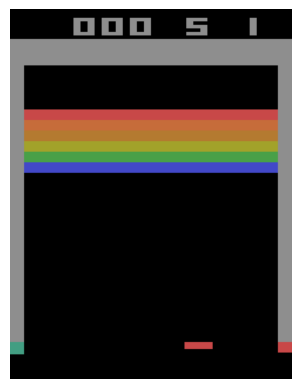

In [3]:
start_state, info = env.reset()

print(start_state.shape)
plt.imshow(start_state)
plt.axis(False);

In [4]:
import numpy as np

In [5]:
obs, _ = env.reset()
print(np.array([obs]).shape)
state = np.stack([obs] * 4, axis=3)

(1, 210, 160, 3)


In [6]:
state.shape, obs.shape

((210, 160, 3, 4), (210, 160, 3))

In [7]:
print(state[:,:,:,1:].shape)
print(np.expand_dims(obs, axis=-1).shape)
np.append(state[:,:,:,1:], np.expand_dims(obs, axis=-1), axis=-1).shape

(210, 160, 3, 3)
(210, 160, 3, 1)


(210, 160, 3, 4)

In [11]:
np.array([0,0,0,0]).any()

False

In [5]:
print(f"Number of possible actions: {env.action_space.n}")
print(f"Action meanings: {env.unwrapped.get_action_meanings()}")

Number of possible actions: 4
Action meanings: ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


In [6]:
obs, reward, terminated, truncated, info = env.step(3)
obs.shape

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(210, 160, 3)

(210, 160, 3)


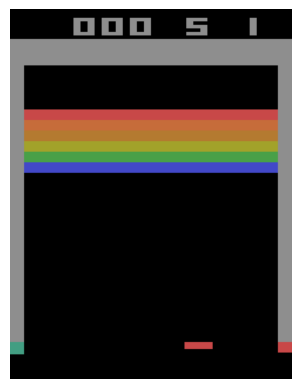

In [8]:
import tensorflow as tf

start_state, info = env.reset()

print(start_state.shape)
plt.imshow(start_state)
plt.axis(False);

### Environment Exploration

In [1]:
# Initialize and reset the Breakout
env =  gym.make("ALE/Breakout-v5",
                full_action_space=False,
                repeat_action_probability=0.1,
                obs_type='rgb')

env.reset();

NameError: name 'gym' is not defined

In [23]:
print(f"Number of possible actions: {env.action_space.n}")
print(f"Action meanings: {env.unwrapped.get_action_meanings()}")

Number of possible actions: 4
Action meanings: ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


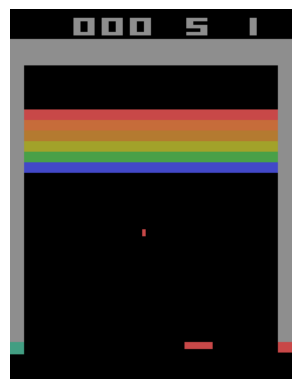

In [24]:
# Get start state
obs, reward, terminated, truncated, info = env.step(1)
plt.imshow(obs)
plt.axis(False);

In [ ]:
# # Play game

# keyToAction = {
#     'd': 2, # move right
#     'a': 3, # move left
#     'w': 0, # no action
#     'r': 1, # start game after losing a life, no effect during the game
# }

# while True:
#     inp = keyboard.read_event()    
#     if keyToAction.get(inp.name, -1) == -1:
#         env.close()
        
#     obs, reward, terminated, truncated, info = env.step(keyToAction[inp.name])
#     env.render()

In [7]:
# Initialize the Breakout environment
env = gym.make("ALE/Breakout-v5",
                full_action_space=False,
                repeat_action_probability=0.1,
                obs_type='rgb')

In [15]:
start_state, info = env.reset()
start_state.shape

# obs, reward, terminated, truncated, info = env.step()

(210, 160, 3)

In [11]:
start_state.shape

(210, 160, 3)

In [9]:
# Import dependencies
import gym
import tensorflow as tf


class ImageTransformer:
    def transform(self, img):
        print(img.shape)
        img = tf.image.rgb_to_grayscale(img)
        print(img.shape)


if __name__ == "__main__":
    # Initialize the Breakout environment
    env = gym.make(
        id="ALE/Breakout-v5",
        full_action_space=False,
        repeat_action_probability=0.1,
        obs_type="rgb",
    )
    start_state, info = env.reset()

    # print(start_state.shape)
    # print(info)

    tf = ImageTransformer()
    tf.transform(start_state)


(210, 160, 3)


AttributeError: 'ImageTransformer' object has no attribute 'image'

In [7]:
import tensorflow as tf

In [8]:
original = tf.constant([[[1.0, 2.0, 3.0]]])
converted = tf.image.rgb_to_grayscale(original)
converted


<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[1.8149]]], dtype=float32)>

In [9]:
# Import dependencies
import gym
import tensorflow as tf


class ImageTransformer:
    def transform(self, img):
        print(img.shape)
        img = tf.image.rgb_to_grayscale(tf.expand_dims(img, axis=0))
        print(img.shape)



# Initialize the Breakout environment
env = gym.make(
    id="ALE/Breakout-v5",
    full_action_space=False,
    repeat_action_probability=0.1,
)
start_state, info = env.reset()

# print(start_state.shape)
# print(info)

tf = ImageTransformer()
tf.transform(start_state)


(210, 160, 3)


AttributeError: 'ImageTransformer' object has no attribute 'image'

In [24]:
# Import dependencies
import gym
import tensorflow as tf

import matplotlib.pyplot as plt


class ImageTransformer:
    def transform(self, img, IMG_SIZE=84):
        img = tf.image.rgb_to_grayscale(img)
        img = tf.image.crop_to_bounding_box(img, 35, 0, 160, 160)
        img = tf.image.resize(
            img,
            size=(IMG_SIZE, IMG_SIZE),
            method=tf.image.ResizeMethod.NEAREST_NEIGHBOR,
        )
        img = tf.cast(img, dtype=tf.float32) / 255.0
        img = tf.squeeze(img)
        assert img.shape == (IMG_SIZE, IMG_SIZE)
        print(img.shape, img.dtype)


if __name__ == "__main__":
    print(tf.__version__)
    # Initialize the Breakout environment
    env = gym.make(
        id="ALE/Breakout-v5",
        full_action_space=False,
        repeat_action_probability=0.1,
        obs_type="rgb",
    )
    start_state, info = env.reset()

    # print(start_state.shape)
    # print(info)

    imgT = ImageTransformer()
    imgT.transform(start_state)


2.15.0
(84, 84) <dtype: 'float32'>


In [30]:
import numpy as np
a = np.empty((5,2), dtype=np.float32)
print(a)
print(a.shape)

[[0.      0.     ]
 [0.      2.8125 ]
 [0.      3.0625 ]
 [0.      3.21875]
 [0.      3.3125 ]]
(5, 2)


In [31]:
a[0][0] = 5

In [32]:
a

array([[5.     , 0.     ],
       [0.     , 2.8125 ],
       [0.     , 3.0625 ],
       [0.     , 3.21875],
       [0.     , 3.3125 ]], dtype=float32)

In [4]:
import numpy as np
import random

In [11]:
np.random.choice(4)

1

In [7]:
random.choice(range(4))

3

In [13]:
from datetime import datetime
datetime.now()

datetime.datetime(2024, 1, 15, 9, 43, 9, 830647)

In [1]:
import numpy as np

In [11]:
terminal_flags = np.empty(25, dtype=bool)
terminal_flags

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False])

In [19]:
import time

In [21]:
time.time()

1705471389.8302445